Step 1: Set Up Your Environment

In [1]:
pip install numpy pandas matplotlib scikit-learn tensorflow keras




Step 2: Load and Explore the MNIST Dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Check the shape of the data
print(f'Training data shape: {train_images.shape}')
print(f'Testing data shape: {test_images.shape}')


11490434/11490434 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


Visualize Some Examples

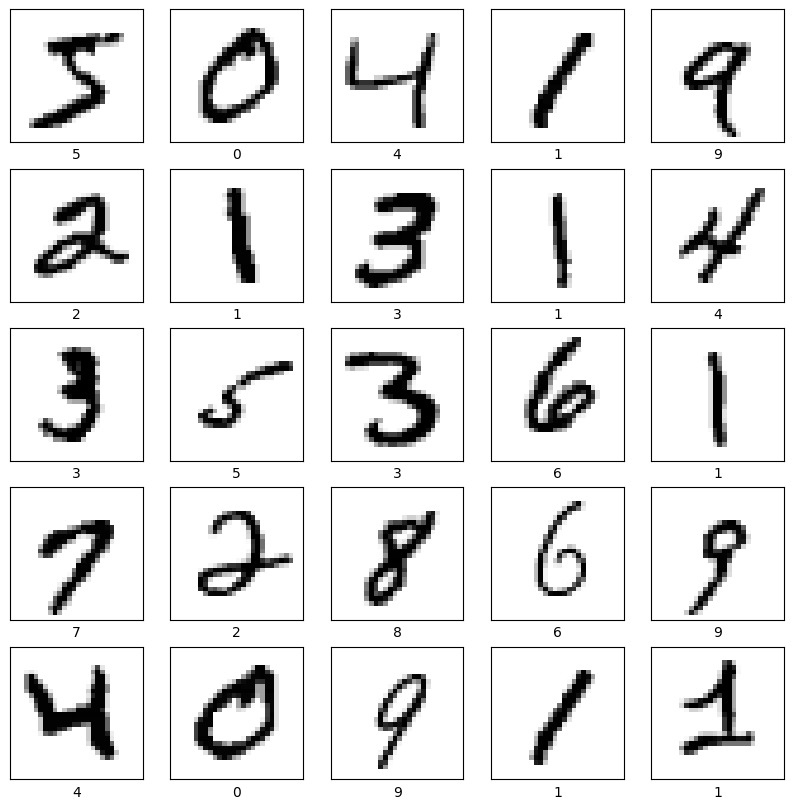

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()


Step 3: Preprocess the Data

In [4]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


Step 4: Build the Model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Step 5: Train the Model

In [6]:
model.fit(train_images, train_labels, epochs=10, batch_size=200, validation_split=0.2)


Epoch 1/10
240/240 [==============================] - 8s 8ms/step - loss: 0.4287 - accuracy: 0.8731 - val_loss: 0.1297 - val_accuracy: 0.9628
Epoch 2/10
240/240 [==============================] - 2s 7ms/step - loss: 0.1570 - accuracy: 0.9529 - val_loss: 0.0793 - val_accuracy: 0.9783
Epoch 3/10
240/240 [==============================] - 1s 5ms/step - loss: 0.1141 - accuracy: 0.9661 - val_loss: 0.0661 - val_accuracy: 0.9809
Epoch 4/10
240/240 [==============================] - 1s 5ms/step - loss: 0.0943 - accuracy: 0.9715 - val_loss: 0.0577 - val_accuracy: 0.9823
Epoch 5/10
240/240 [==============================] - 1s 5ms/step - loss: 0.0827 - accuracy: 0.9756 - val_loss: 0.0527 - val_accuracy: 0.9841
Epoch 6/10
240/240 [==============================] - 1s 5ms/step - loss: 0.0737 - accuracy: 0.9777 - val_loss: 0.0532 - val_accuracy: 0.9843
Epoch 7/10
240/240 [==============================] - 1s 5ms/step - loss: 0.0680 - accuracy: 0.9793 - val_loss: 0.0510 - val_accuracy: 0.9856
Epoch 

Step 6: Evaluate the Model

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


313/313 [==============================] - 1s 4ms/step - loss: 0.0397 - accuracy: 0.9864
Test accuracy: 0.9864000082015991


Step 7: Make Predictions

In [8]:
predictions = model.predict(test_images)


313/313 [==============================] - 1s 3ms/step


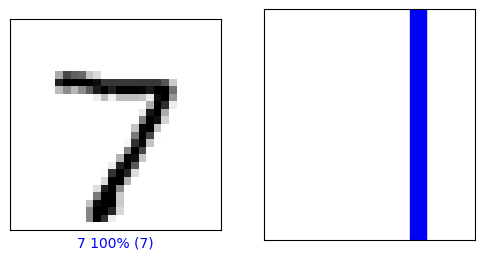

In [10]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == np.argmax(true_label):
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                        100*np.max(predictions_array),
                                        np.argmax(true_label)),
                                        color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[np.argmax(true_label)].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()


Accept User Input

In [14]:
# Assume `model` is your trained model
model.save('digit_recognition_model.h5')


Enter the path to the image: /content/testingimage.png
1/1 [==============================] - 0s 106ms/step
The predicted digit is: 5


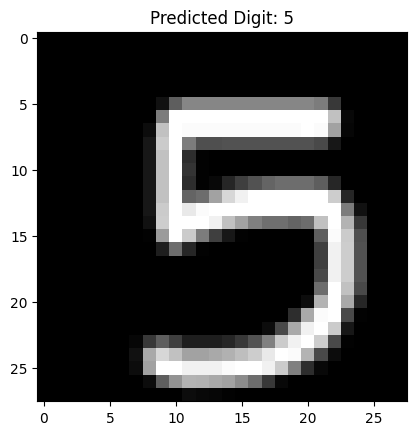

In [13]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('digit_recognition_model.h5')

# Function to preprocess the user-provided image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(28, 28), color_mode="grayscale")
    img = image.img_to_array(img)
    img = img.reshape(1, 28, 28, 1)
    img = img.astype('float32')
    img /= 255
    return img

# Function to predict the digit
def predict_digit(img_path):
    img = preprocess_image(img_path)
    prediction = model.predict(img)
    return np.argmax(prediction)

# User provides the image path
img_path = input("Enter the path to the image: ")

# Make a prediction
predicted_digit = predict_digit(img_path)

# Display the result
print(f'The predicted digit is: {predicted_digit}')

# Optionally, display the image
plt.imshow(image.load_img(img_path, target_size=(28, 28), color_mode="grayscale"), cmap=plt.cm.binary)
plt.title(f'Predicted Digit: {predicted_digit}')
plt.show()
